In [4]:
%load_ext autoreload
%autoreload 2

In [53]:
import functions.init_logger
import logging
logger = logging.getLogger(__name__)

In [3]:
import functions.add_path
import functions.et_condition_df as condition_df

import functions.plotnine_theme
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
from plotnine import *
from plotnine.data import *


import be_load

/home/student/b/behinger/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


reached exception:pyaudio
reached exception:optimization_calibration
reached exception:glfw.GLFW_PRESS
reached exception:glfw.GLFW_KEY_SPACE
reached exception:glfw.GLFW_KEY_F
reached exception:glfw.glfwSetKeyCallback
reached exception:fingertip_calibration
reached exception:glfw.GLFW_PRESS
reached exception:natural_features_calibration
reached exception:optimization_calibration
reached exception:optimization_calibration
reached exception:glfw.GLFW_PRESS
reached exception:glfw.GLFW_KEY_SPACE
reached exception:glfw.GLFW_KEY_F
reached exception:glfw.glfwSetKeyCallback
reached exception:fingertip_calibration
reached exception:glfw.GLFW_PRESS
reached exception:natural_features_calibration
reached exception:optimization_calibration


In [5]:
import os
print(os.getcwd())
if os.getcwd()[-4:] != 'code':
    try:
        os.chdir('./code')
    except:
        os.chdir('/net/store/nbp/users/behinger/projects/etcomp/code')


/net/store/nbp/users/behinger/projects/etcomp/lib/pupil/pupil_src/shared_modules/calibration_routines/optimization_calibration


In [6]:
(etsamples,etmsgs,etevents) = be_load.load_data()

loading subject VP1 with et el
loading subject VP1 with et pl
loading subject VP2 with et el
loading subject VP2 with et pl
loading subject VP3 with et el
loading subject VP3 with et pl
loading subject VP4 with et el
loading subject VP4 with et pl
loading subject VP11 with et el
loading subject VP11 with et pl
loading subject VP12 with et el
loading subject VP12 with et pl
loading subject VP14 with et el
loading subject VP14 with et pl
loading subject VP15 with et el
loading subject VP15 with et pl
loading subject VP19 with et el
loading subject VP19 with et pl
loading subject VP20 with et el
loading subject VP20 with et pl
loading subject VP22 with et el
loading subject VP22 with et pl
loading subject VP23 with et el
loading subject VP23 with et pl
loading subject VP24 with et el
loading subject VP24 with et pl
loading subject VP25 with et el
loading subject VP25 with et pl
loading subject VP26 with et el
loading subject VP26 with et pl
loading subject results with et el
File b'/net/s

In [7]:
import BLINK
import SMOOTH
import LARGE_GRID
import LARGE_and_SMALL_GRID
import FREEVIEW

In [8]:
print(etsamples.subject.unique())
print("There are %i subjects"%(etsamples.subject.unique().shape))

['VP1' 'VP2' 'VP3' 'VP4' 'VP11' 'VP12' 'VP14' 'VP15' 'VP19' 'VP20' 'VP22'
 'VP23' 'VP24' 'VP25' 'VP26']
There are 15 subjects


## Blink Analysis

In [7]:
#%% Do Blink Analysis
blink= condition_df.get_condition_df(data=(etsamples,etmsgs,etevents),condition="BLINK")

CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP1 
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP1 
CRITICAL:functions.e

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 1 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_jitter : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


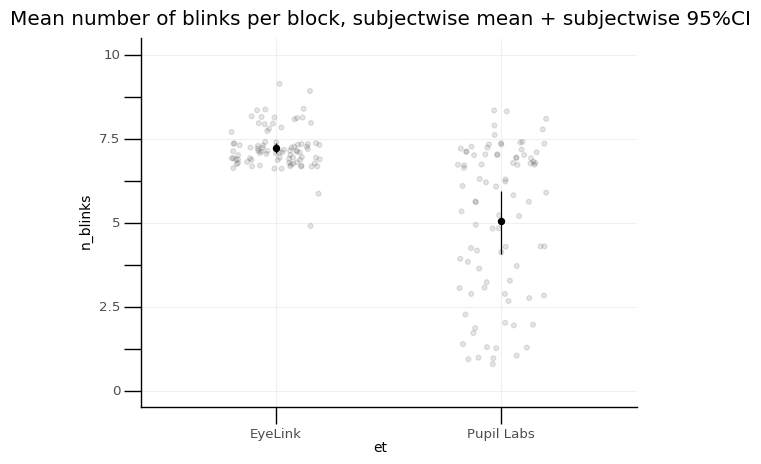

In [8]:
BLINK.plot_count(blink)

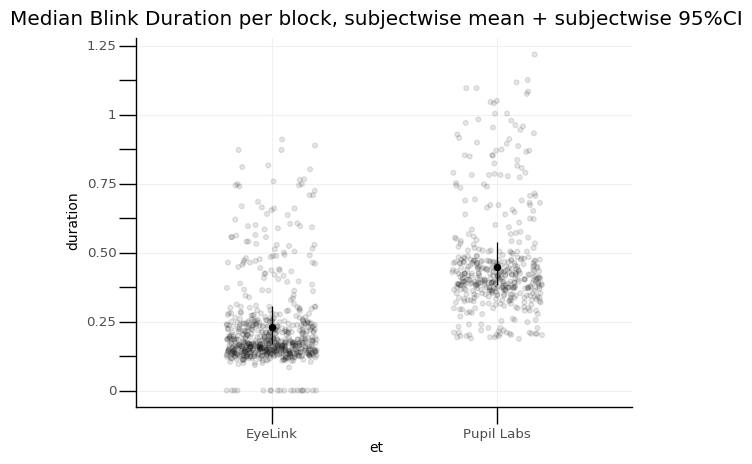

In [9]:
BLINK.plot_duration(blink)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_jitter : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


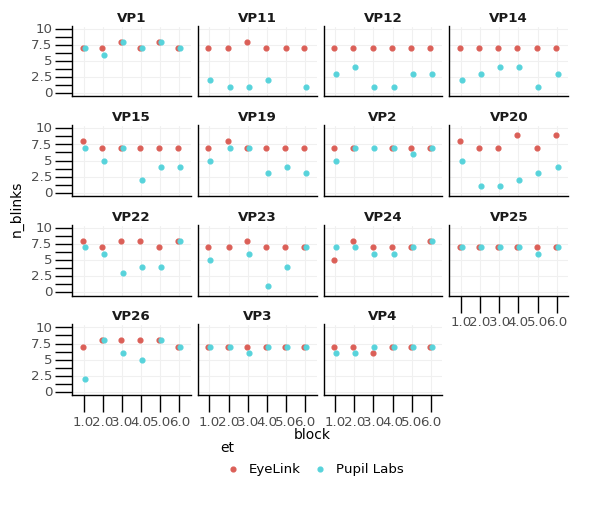

In [10]:
BLINK.plot_count(blink,option="facet_subjects")

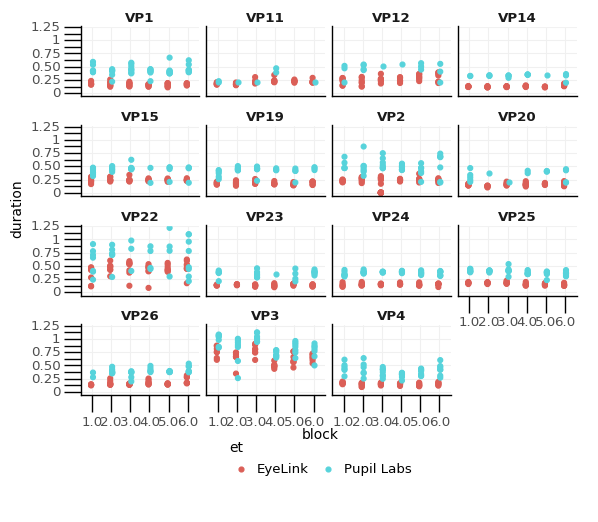

In [11]:
BLINK.plot_duration(blink,option="facet_subjects")

# Smooth Pursuit

In [31]:
cfg = {'redo':False} # should be specified in the beginning of the notebook
if cfg['redo']:
    smoothresult = SMOOTH.fit_bayesian_model(etsamples,etmsgs,etevents)
    SMOOTH.save_smooth(smoothresult)
else:
    smoothresult = SMOOTH.load_smooth()

In [32]:
import SMOOTH
%autoreload 2
%matplotlib inline


Plot some single trials first

In [33]:
smooth_stanmodel = SMOOTH.compileModel() # to facilitate plotting 

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8875299d4f0849455d5b6cf28abae5ce NOW.


msg 0 from 1


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


msg 0 from 1


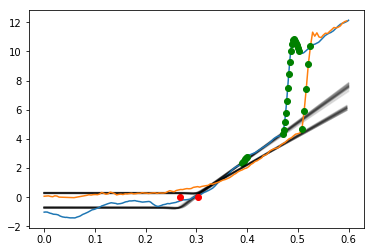

In [34]:
fitA = SMOOTH.plot_single_trial(etsamples,etmsgs,None,'VP1','el',5,1,smooth_stanmodel) # trial 1, block 1
fitB = SMOOTH.plot_single_trial(etsamples,etmsgs,None,'VP1','pl',5,1,smooth_stanmodel) # trial 1, block 1

Main Results follow. First latency, then estimated velocity

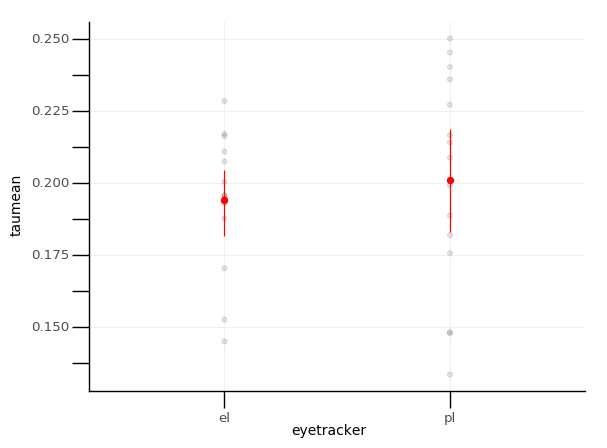

In [35]:
SMOOTH.plot_init_latency(smoothresult,option="")

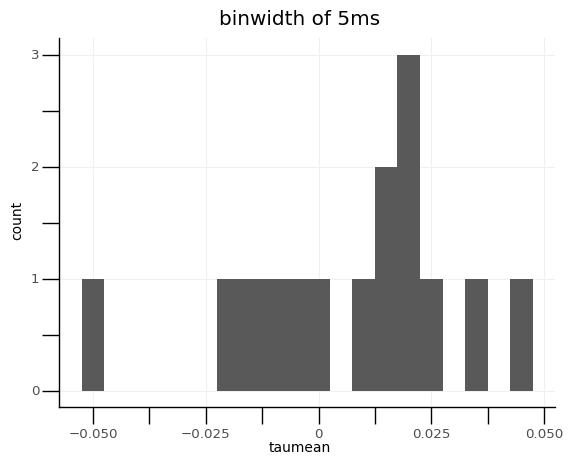

In [36]:
SMOOTH.plot_init_latency(smoothresult,option="difference")

In [25]:
smooth = condition_df.get_condition_df(data=(etsamples,etmsgs,etevents),condition="SMOOTHPURSUIT")

CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP1 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP1 
CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP2 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP2 
CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP3 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP3 
CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP4 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP4 
CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP11 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP11 
CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP12 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP12 
CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP14 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP14 
CRITICAL:functions.et_condition_df:Eyetracker: el    Sub

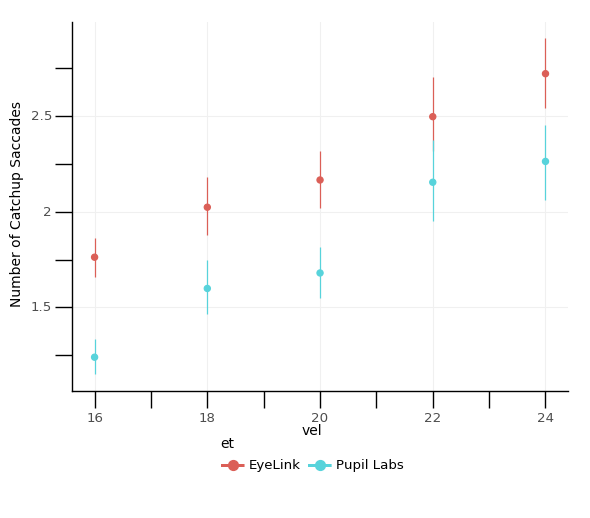

<ggplot: (8742410190754)>

In [27]:
SMOOTH.plot_catchup_amplitudes(smooth)

# Large Grid

In [111]:
(etsamples_grid,etmsgs_grid,etevents_grid) = be_load.load_data(algorithm='hmmnosmooth_')

loading subject VP1 with et el
loading subject VP1 with et pl
loading subject VP2 with et el
loading subject VP2 with et pl
loading subject VP3 with et el
loading subject VP3 with et pl
loading subject VP4 with et el
loading subject VP4 with et pl
loading subject VP11 with et el
loading subject VP11 with et pl
loading subject VP12 with et el
loading subject VP12 with et pl
loading subject VP14 with et el
loading subject VP14 with et pl
loading subject VP15 with et el
loading subject VP15 with et pl
loading subject VP19 with et el
loading subject VP19 with et pl
loading subject VP20 with et el
loading subject VP20 with et pl
loading subject VP22 with et el
loading subject VP22 with et pl
loading subject VP23 with et el
loading subject VP23 with et pl
loading subject VP24 with et el
loading subject VP24 with et pl
loading subject VP25 with et el
loading subject VP25 with et pl
loading subject VP26 with et el
loading subject VP26 with et pl
loading subject results with et el
File b'/net/s

In [112]:
etsamples_grid.iloc[0:1]

,gy_vel,pa,gx,smpl_time,gy,gx_vel,confidence,type,outside,zero_pa,neg_time,blink_id,algorithm,eyetracker,subject
0,100000000.0,551.0,-0.751137,29.343,-19.958101,100000000.0,NaN,fixation,False,False,False,0,hmmnosmooth_,el,VP1


In [113]:
raw_large_grid_df = condition_df.get_condition_df(data=(etsamples_grid,etmsgs_grid,etevents_grid),condition='LARGE_GRID')

DEBUG:functions.et_condition_df:Data already loaded, just applying transformations


2018-08-11 11:24:59 - functions.et_condition_df                                         - DEBUG    - Data already loaded, just applying transformations


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP1 


2018-08-11 11:25:00 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP1 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP1 


2018-08-11 11:25:03 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP1 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP2 


2018-08-11 11:25:04 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP2 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP2 


2018-08-11 11:25:04 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP2 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP3 


2018-08-11 11:25:05 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP3 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP3 


2018-08-11 11:25:06 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP3 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP4 


2018-08-11 11:25:07 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP4 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP4 


2018-08-11 11:25:08 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP4 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP11 


2018-08-11 11:25:09 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP11 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP11 


2018-08-11 11:25:10 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP11 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP12 


2018-08-11 11:25:10 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP12 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP12 


2018-08-11 11:25:11 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP12 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP14 


2018-08-11 11:25:12 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP14 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP14 


2018-08-11 11:25:13 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP14 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP15 


2018-08-11 11:25:14 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP15 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP15 


2018-08-11 11:25:15 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP15 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP19 


2018-08-11 11:25:16 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP19 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP19 


2018-08-11 11:25:17 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP19 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP20 


2018-08-11 11:25:18 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP20 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP20 


2018-08-11 11:25:19 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP20 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP22 


2018-08-11 11:25:20 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP22 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP22 


2018-08-11 11:25:21 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP22 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP23 


2018-08-11 11:25:22 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP23 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP23 


2018-08-11 11:25:22 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP23 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP24 


2018-08-11 11:25:23 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP24 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP24 


2018-08-11 11:25:24 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP24 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP25 


2018-08-11 11:25:25 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP25 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP25 


2018-08-11 11:25:26 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP25 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP26 


2018-08-11 11:25:27 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP26 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP26 


2018-08-11 11:25:28 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP26 


DEBUG:root:dtypes of the df before: block            float64
element          float64
type              object
end_time         float64
mean_gx          float64
duration         float64
start_time       float64
rms              float64
mean_gy          float64
condition         object
exp_event         object
grid_size        float64
msg_time         float64
posx             float64
posy             float64
hori_accuracy    float64
vert_accuracy    float64
accuracy         float64
et                object
eyetracker        object
subject           object
dtype: object


2018-08-11 11:25:29 - root                                                              - DEBUG    - dtypes of the df before: block            float64
element          float64
type              object
end_time         float64
mean_gx          float64
duration         float64
start_time       float64
rms              float64
mean_gy          float64
condition         object
exp_event         object
grid_size        float64
msg_time         float64
posx             float64
posy             float64
hori_accuracy    float64
vert_accuracy    float64
accuracy         float64
et                object
eyetracker        object
subject           object
dtype: object


DEBUG:root:dtypes of the df after: block            category
element           float64
type             category
end_time          float64
mean_gx           float64
duration          float64
start_time        float64
rms               float64
mean_gy           float64
condition        category
exp_event        category
grid_size         float64
msg_time          float64
posx              float64
posy              float64
hori_accuracy     float64
vert_accuracy     float64
accuracy          float64
et               category
eyetracker       category
subject          category
dtype: object


2018-08-11 11:25:29 - root                                                              - DEBUG    - dtypes of the df after: block            category
element           float64
type             category
end_time          float64
mean_gx           float64
duration          float64
start_time        float64
rms               float64
mean_gy           float64
condition        category
exp_event        category
grid_size         float64
msg_time          float64
posx              float64
posy              float64
hori_accuracy     float64
vert_accuracy     float64
accuracy          float64
et               category
eyetracker       category
subject          category
dtype: object


In [114]:
LARGE_GRID.make_table_accuracy(raw_large_grid_df)

,mean,median,horizontal_mean,vertical_mean,subject_min_accuracy,subject_max_accuracy,mean_rms
EyeLink,1.25722,1.00374,0.90134,0.928133,0.621138,3.32787,0.105255
Pupil Labs,1.62341,1.32028,1.14565,1.29937,0.914179,4.06802,0.079189


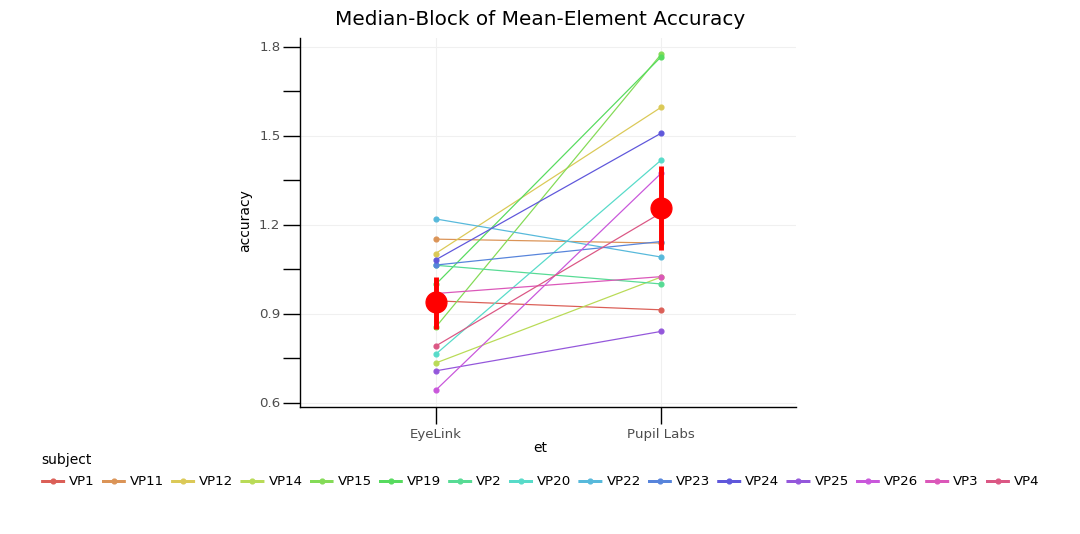

<ggplot: (-9223363294475634225)>

In [139]:
LARGE_GRID.plot_accuracy_be(raw_large_grid_df)+ggtitle("Median-Block of Mean-Element Accuracy")

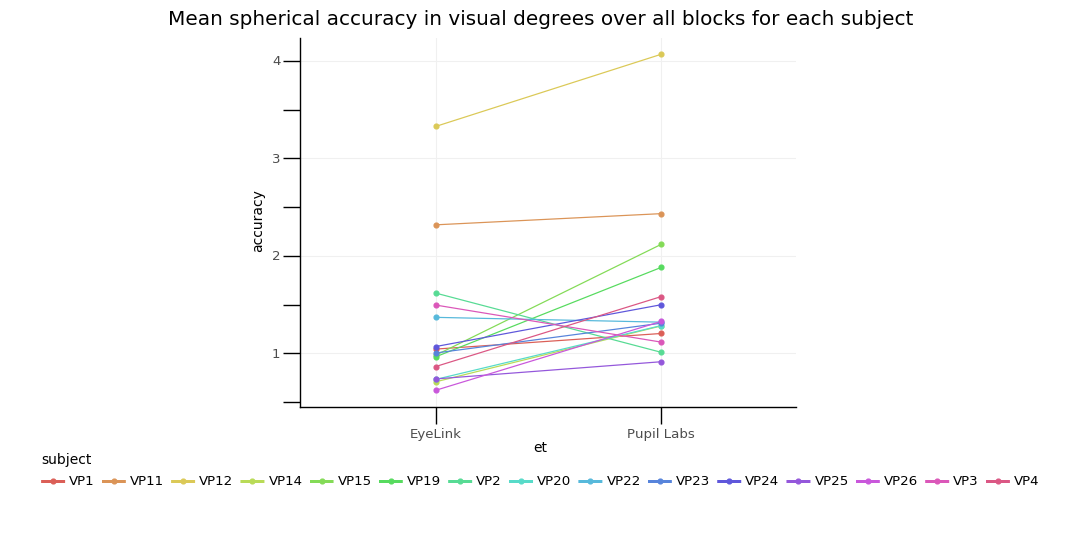

In [140]:
LARGE_GRID.plot_accuracy(raw_large_grid_df)


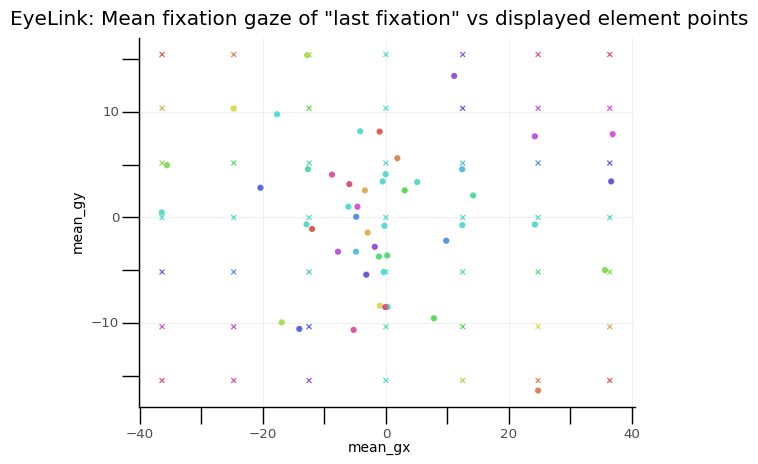

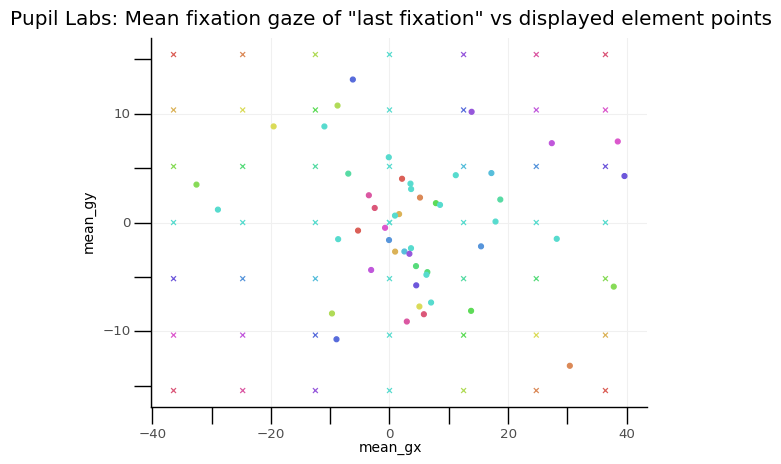

In [141]:
LARGE_GRID.display_fixations(raw_large_grid_df, option='offset')

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 124 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


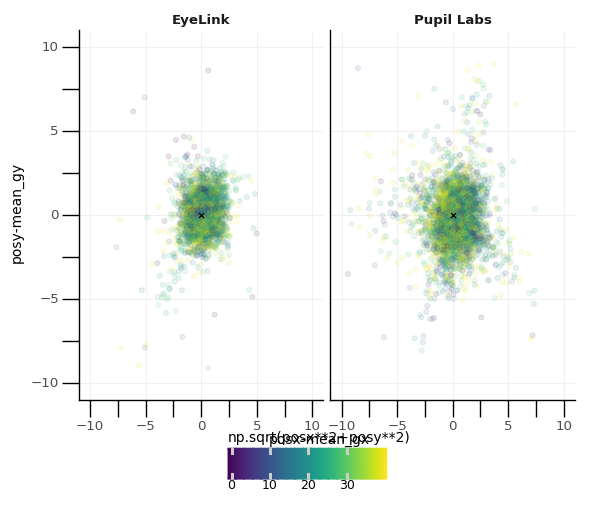

<ggplot: (8742377986529)>

In [118]:
LARGE_GRID.display_fixation_centered(raw_large_grid_df)+xlim((-10,10))+ylim((-10,10))

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


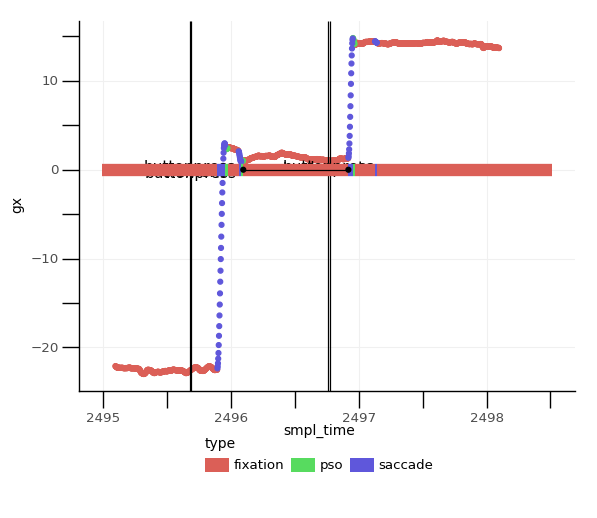

<ggplot: (-9223363294444454796)>

In [126]:
from functions import et_helper
et_helper.plot_around_event(etsamples_grid,etmsgs_grid,etevents_grid,raw_large_grid_df.iloc[150],plusminus=(-1,2))

## Comparison of two Fixation Defining algorithms
This can be thought of a precursor to compare different pupillabs detection algorithms e.g. (3D vs 2D)

In [108]:
#%%capture
(etsamples_engbert,etmsgs_engbert,etevents_engbert) = be_load.load_data(algorithm='')
raw_large_grid_df_engbert = condition_df.get_condition_df(data=(etsamples_engbert,etmsgs_engbert,etevents_engbert),condition='LARGE_GRID')

loading subject VP1 with et el
loading subject VP1 with et pl
loading subject VP2 with et el
loading subject VP2 with et pl
loading subject VP3 with et el
loading subject VP3 with et pl
loading subject VP4 with et el
loading subject VP4 with et pl
loading subject VP11 with et el
loading subject VP11 with et pl
loading subject VP12 with et el
loading subject VP12 with et pl
loading subject VP14 with et el
loading subject VP14 with et pl
loading subject VP15 with et el
loading subject VP15 with et pl
loading subject VP19 with et el
loading subject VP19 with et pl
loading subject VP20 with et el
loading subject VP20 with et pl
loading subject VP22 with et el
loading subject VP22 with et pl
loading subject VP23 with et el
loading subject VP23 with et pl
loading subject VP24 with et el
loading subject VP24 with et pl
loading subject VP25 with et el
loading subject VP25 with et pl
loading subject VP26 with et el
loading subject VP26 with et pl
loading subject results with et el
File b'/net/s

DEBUG:functions.et_condition_df:Data already loaded, just applying transformations


2018-08-11 11:10:06 - functions.et_condition_df                                         - DEBUG    - Data already loaded, just applying transformations


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP1 


2018-08-11 11:10:07 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP1 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP1 


2018-08-11 11:10:10 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP1 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP2 


2018-08-11 11:10:10 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP2 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP2 


2018-08-11 11:10:11 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP2 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP3 


2018-08-11 11:10:12 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP3 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP3 


2018-08-11 11:10:13 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP3 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP4 


2018-08-11 11:10:14 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP4 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP4 


2018-08-11 11:10:15 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP4 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP11 


2018-08-11 11:10:16 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP11 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP11 


2018-08-11 11:10:16 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP11 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP12 


2018-08-11 11:10:17 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP12 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP12 


2018-08-11 11:10:18 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP12 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP14 


2018-08-11 11:10:19 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP14 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP14 


2018-08-11 11:10:20 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP14 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP15 


2018-08-11 11:10:21 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP15 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP15 


2018-08-11 11:10:22 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP15 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP19 


2018-08-11 11:10:23 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP19 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP19 


2018-08-11 11:10:24 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP19 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP20 


2018-08-11 11:10:25 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP20 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP20 


2018-08-11 11:10:25 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP20 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP22 


2018-08-11 11:10:26 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP22 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP22 


2018-08-11 11:10:27 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP22 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP23 


2018-08-11 11:10:28 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP23 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP23 


2018-08-11 11:10:29 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP23 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP24 


2018-08-11 11:10:30 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP24 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP24 


2018-08-11 11:10:31 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP24 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP25 


2018-08-11 11:10:32 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP25 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP25 


2018-08-11 11:10:32 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP25 


CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP26 


2018-08-11 11:10:33 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP26 


CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP26 


2018-08-11 11:10:34 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP26 


DEBUG:root:dtypes of the df before: block            float64
element          float64
type              object
end_time         float64
mean_gx          float64
duration         float64
start_time       float64
rms              float64
mean_gy          float64
condition         object
exp_event         object
grid_size        float64
msg_time         float64
posx             float64
posy             float64
hori_accuracy    float64
vert_accuracy    float64
accuracy         float64
et                object
eyetracker        object
subject           object
dtype: object


2018-08-11 11:10:35 - root                                                              - DEBUG    - dtypes of the df before: block            float64
element          float64
type              object
end_time         float64
mean_gx          float64
duration         float64
start_time       float64
rms              float64
mean_gy          float64
condition         object
exp_event         object
grid_size        float64
msg_time         float64
posx             float64
posy             float64
hori_accuracy    float64
vert_accuracy    float64
accuracy         float64
et                object
eyetracker        object
subject           object
dtype: object


DEBUG:root:dtypes of the df after: block            category
element           float64
type             category
end_time          float64
mean_gx           float64
duration          float64
start_time        float64
rms               float64
mean_gy           float64
condition        category
exp_event        category
grid_size         float64
msg_time          float64
posx              float64
posy              float64
hori_accuracy     float64
vert_accuracy     float64
accuracy          float64
et               category
eyetracker       category
subject          category
dtype: object


2018-08-11 11:10:35 - root                                                              - DEBUG    - dtypes of the df after: block            category
element           float64
type             category
end_time          float64
mean_gx           float64
duration          float64
start_time        float64
rms               float64
mean_gy           float64
condition        category
exp_event        category
grid_size         float64
msg_time          float64
posx              float64
posy              float64
hori_accuracy     float64
vert_accuracy     float64
accuracy          float64
et               category
eyetracker       category
subject          category
dtype: object


In [ ]:
GRID_accuracy_table = pd.concat(
    [LARGE_GRID.make_table_accuracy(raw_large_grid_df).assign(        algorithm='hmm_nosmooth'),
     LARGE_GRID.make_table_accuracy(raw_large_grid_df_engbert).assign(algorithm='engbert'     )])
GRID_accuracy_table

# Microsaccades

In [51]:
import MICROSACC

In [54]:
microsaccades = MICROSACC.detect_microsaccades(etsamples=etsamples,etmsgs=etmsgs,etevents=etevents)

Index(['eyetracker', 'subject', 'count', 'amplitude mean'], dtype='object')


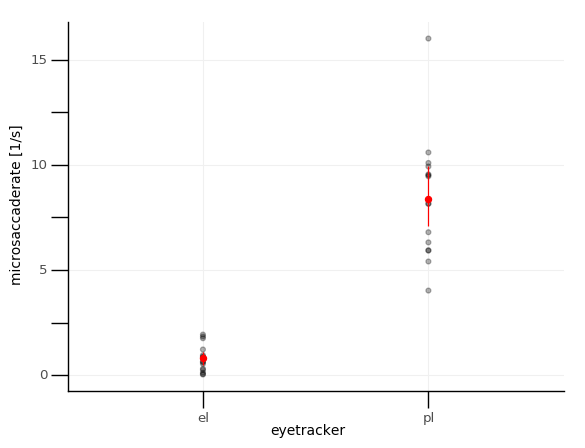

<ggplot: (-9223363294477563118)>

In [98]:
# 6 blocks x 20s
MICROSACC.plot_default(microsaccades,subtype="count/(6*20)")+ylab("microsaccaderate [1/s]")

It is highly unlikely to have ~7 microsaccades per second. Pupillabs eyetracker does not seem able to find microsaccades without tweaking the algorithm.

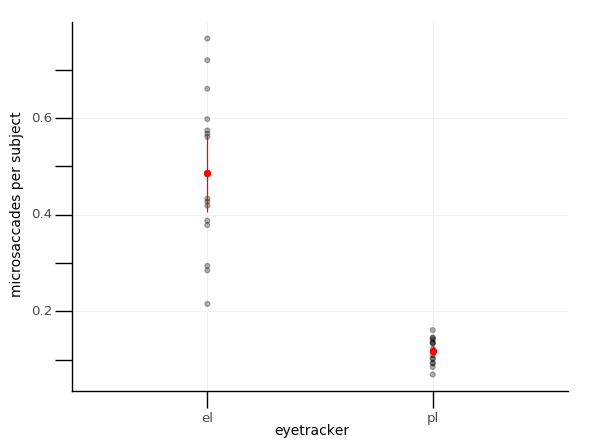

<ggplot: (8742410321405)>

In [79]:
MICROSACC.plot_amplitude(microsaccades,subtype="amplitude mean")

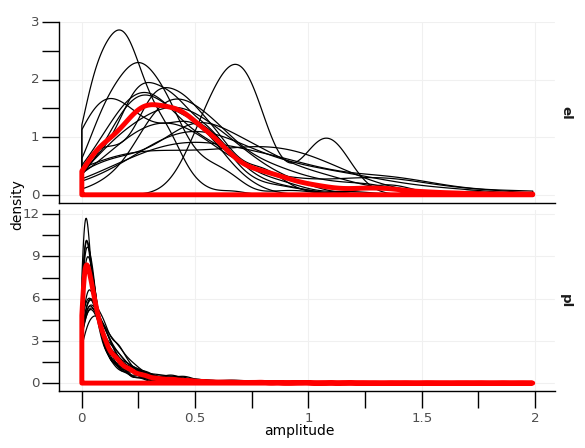

<ggplot: (8742377284763)>

In [92]:
MICROSACC.plot_densities(microsaccades)

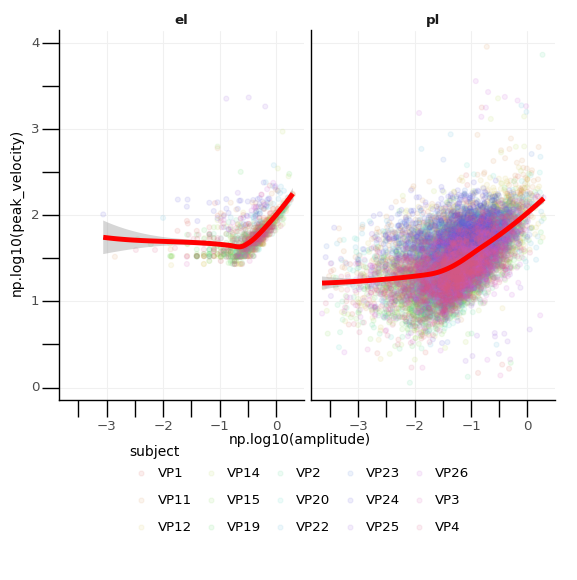

<ggplot: (8742377754218)>

In [90]:
MICROSACC.plot_mainsequence(microsaccades)